In [20]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np # version 1.16

# setup a virtual environment
# pipenv shell
# pip install tensorflow numpy==1.16 sklearn matplotlib

Instructions for updating:
non-resource variables are not supported in the long term


In [88]:
corpus_raw1 = 'He is the king . The king is royal . She is the royal  queen '
corpus_raw = ' Me gusta jugar fútbol con mis amigos'
# convert to lower case
corpus_raw = corpus_raw.lower()

words = []
for word in corpus_raw.split():
    if word != '.': # because we don't want to treat . as a word
        words.append(word)

words = set(words) # so that all duplicate words are removed
word2int = {}
int2word = {}
vocab_size = len(words) # gives the total number of unique words

In [131]:

for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

# raw sentences is a list of sentences.
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())
    print(sentence)
    #print(word2int['sentences.split()'])

 me gusta jugar fútbol con mis amigos


In [122]:
print(word2int['fútbol'])
print(word2int['con'])

4
2


Si el tamaño de la ventana  WINDOW_SIZE  es más grande  hay más posibilidad de encontrar más palabras cercanas  y el conjunto de entrenamiento crece.

In [134]:
WINDOW_SIZE = 3

data = []
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                data.append([word, nb_word])
       

In [135]:
print(data)

[['me', 'gusta'], ['me', 'jugar'], ['me', 'fútbol'], ['gusta', 'me'], ['gusta', 'jugar'], ['gusta', 'fútbol'], ['gusta', 'con'], ['jugar', 'me'], ['jugar', 'gusta'], ['jugar', 'fútbol'], ['jugar', 'con'], ['jugar', 'mis'], ['fútbol', 'me'], ['fútbol', 'gusta'], ['fútbol', 'jugar'], ['fútbol', 'con'], ['fútbol', 'mis'], ['fútbol', 'amigos'], ['con', 'gusta'], ['con', 'jugar'], ['con', 'fútbol'], ['con', 'mis'], ['con', 'amigos'], ['mis', 'jugar'], ['mis', 'fútbol'], ['mis', 'con'], ['mis', 'amigos'], ['amigos', 'fútbol'], ['amigos', 'con'], ['amigos', 'mis']]


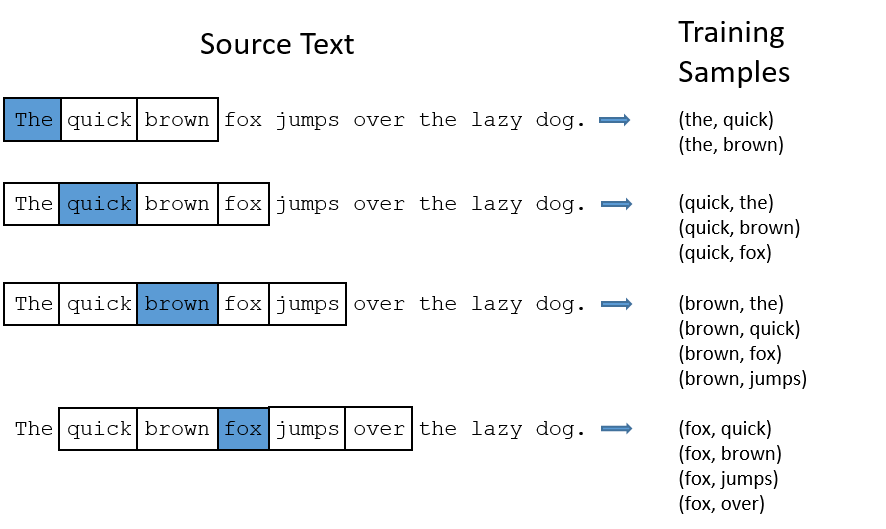

In [114]:
from IPython.display import Image
Image(filename='corpus-2.png')

In [136]:
# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp

In [137]:
x_train = [] # input word
y_train = [] # output word

for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))
    #print(data_word[0],y_train)
# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
print(x_train) 
#print('conjunto de entrenamiento---------')
#print(y_train)
print(x_train.shape, y_train.shape)

[[0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]
(30, 7) (30, 7)


In [139]:
print(x_train.shape[0])
#puntos de entrenamiento, donde cada punto tiene 7 dimensiones, que crecen depeniendo de la ventana de contexto

30


In [140]:
# making placeholders for x_train and y_train
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

EMBEDDING_DIM = 10 # you can choose your own number
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias
hidden_representation = tf.add(tf.matmul(x,W1), b1)

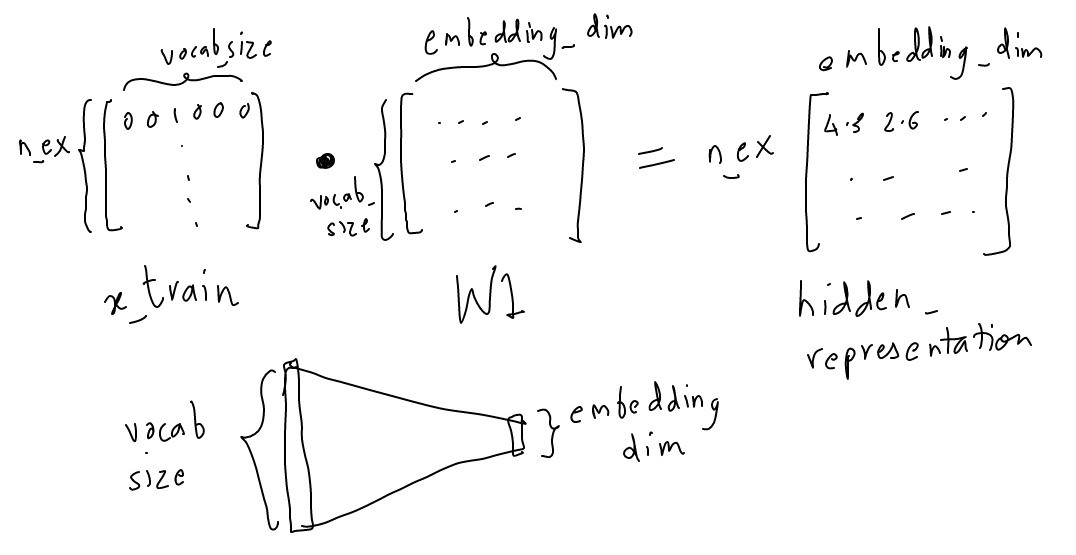

In [80]:
from IPython.display import Image
Image(filename='train-embedding.jpeg')
 
 

In [141]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

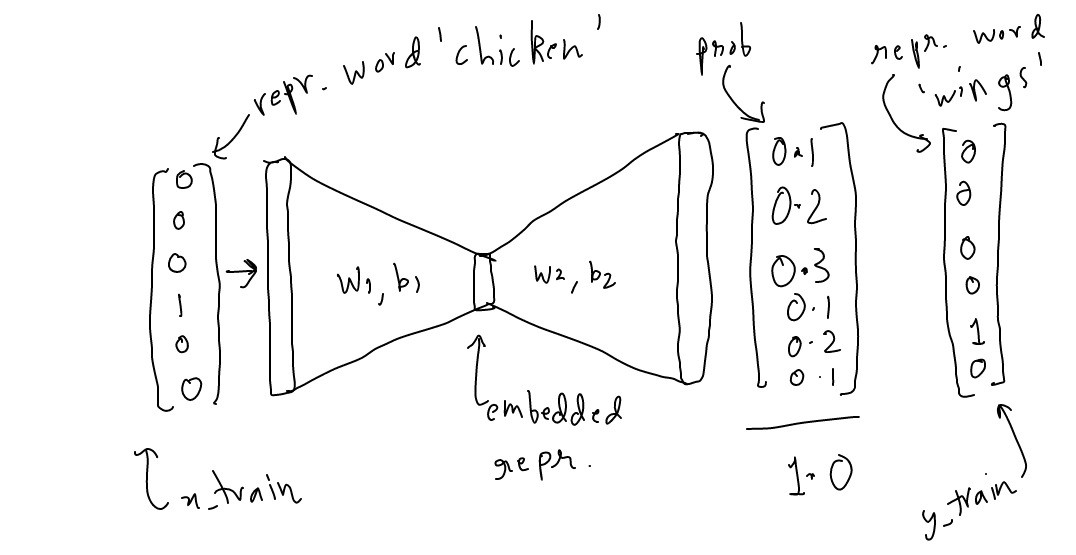

In [83]:
from IPython.display import Image
Image(filename='training-embedding1.jpeg')

In [142]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) #make sure you do this!
# define the loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))
# define the training step:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)
n_iters = 10000
# train for n_iter iterations
for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))

loss is :  4.236854
loss is :  3.878787
loss is :  3.5763388
loss is :  3.3244896
loss is :  3.1186044
loss is :  2.9524267
loss is :  2.8181427
loss is :  2.708008
loss is :  2.615744
loss is :  2.5368476
loss is :  2.468242
loss is :  2.40781
loss is :  2.35405
loss is :  2.3058577
loss is :  2.2623956
loss is :  2.2230134
loss is :  2.1871936
loss is :  2.1545155
loss is :  2.124629
loss is :  2.097236
loss is :  2.072077
loss is :  2.0489244
loss is :  2.027574
loss is :  2.007844
loss is :  1.9895692
loss is :  1.9726024
loss is :  1.9568106
loss is :  1.9420753
loss is :  1.9282911
loss is :  1.9153638
loss is :  1.903211
loss is :  1.8917582
loss is :  1.8809422
loss is :  1.8707055
loss is :  1.8609984
loss is :  1.8517766
loss is :  1.843002
loss is :  1.8346398
loss is :  1.8266598
loss is :  1.8190352
loss is :  1.8117417
loss is :  1.804758
loss is :  1.7980644
loss is :  1.791643
loss is :  1.7854786
loss is :  1.7795557
loss is :  1.7738609
loss is :  1.7683823
loss is : 


Eventualmente se estabiliza en una pérdida constante. Aunque no podemos obtener una alta precisión, no nos importa. Todo lo que nos interesa es W1 y b1, es decir, las representaciones ocultas.


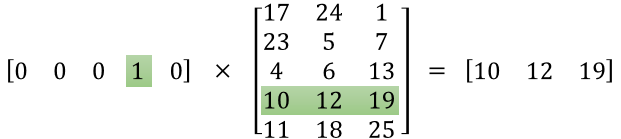

In [99]:
from IPython.display import Image
Image(filename='one-hot.png')

In [143]:
print(sess.run(W1))
print('----------')
print(sess.run(b1))
print('----------')

[[ 0.5030237  -1.0421063   0.74425703 -0.3760452   2.3945878   0.62342125
   0.15733786 -1.5232646  -0.5011502   0.5822438 ]
 [ 0.43289843 -1.2802616   1.0377562  -0.9094626  -1.8388388   0.03834464
   0.49091578 -0.667425    1.1907265   0.46277216]
 [-0.6000712  -1.8413231   1.7333004   0.6928944   0.9015088  -0.6410492
  -1.1810731   0.8123137  -0.81759024 -0.24444635]
 [ 1.896431    1.0918142   0.12049391  0.4981765  -1.1448991   0.08562228
  -0.15463433  0.47648862 -1.8362031   1.456412  ]
 [-0.0592749  -0.12066731 -0.86494803  0.76356393 -1.4911445  -1.7056412
  -1.2116168  -1.7944217  -0.45386598 -0.9981068 ]
 [-0.44724694  1.3542229   0.5877488   2.1123414   1.1014507   1.8132509
   0.10221419 -0.6617203   0.31950182  0.54653543]
 [-0.2793367   2.1246068   1.1439985   0.32828322  0.46132338 -1.6815306
   0.10108601  1.4021642   0.4501961  -1.0299016 ]]
----------
[ 0.5153233   1.2549496  -0.8445919   0.03908433  0.801441   -0.2512318
  0.13351065  0.4433321   0.40356365  0.19574

In [144]:
vectors = sess.run(W1 + b1)

# if you work it out, you will see that it has the same effect as running the node hidden representation
print(vectors)


[[ 1.018347    0.2128433  -0.10033488 -0.33696088  3.1960287   0.37218946
   0.2908485  -1.0799326  -0.09758654  0.7779925 ]
 [ 0.9482217  -0.02531207  0.19316429 -0.87037826 -1.0373979  -0.21288715
   0.6244264  -0.22409287  1.5942901   0.6585209 ]
 [-0.08474791 -0.58637357  0.88870853  0.7319787   1.7029498  -0.892281
  -1.0475624   1.2556458  -0.4140266  -0.04869765]
 [ 2.4117541   2.3467636  -0.724098    0.53726083 -0.34345812 -0.16560951
  -0.02112368  0.9198207  -1.4326395   1.6521606 ]
 [ 0.45604837  1.1342822  -1.7095399   0.80264825 -0.6897035  -1.9568729
  -1.0781062  -1.3510896  -0.05030233 -0.8023581 ]
 [ 0.06807634  2.6091723  -0.2568431   2.1514258   1.9028916   1.5620191
   0.23572484 -0.21838817  0.7230655   0.7422841 ]
 [ 0.23598659  3.3795564   0.2994066   0.36736754  1.2627645  -1.9327624
   0.23459667  1.8454963   0.85375977 -0.83415294]]


In [145]:
print(vectors[ word2int['jugar'] ])
# say here word2int['queen'] is 2

[ 0.06807634  2.6091723  -0.2568431   2.1514258   1.9028916   1.5620191
  0.23572484 -0.21838817  0.7230655   0.7422841 ]


Normalización TSNE para dibujar los vectores de dimensión 10 en vectores en R X R

In [146]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors) 

from sklearn import preprocessing

normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, '12')

print(vectors)

[[-0.44168463  0.89717036]
 [-0.9681673   0.25030422]
 [ 0.27932444  0.96019673]
 [ 0.86206335  0.5068005 ]
 [-0.42587128 -0.9047838 ]
 [ 0.17900556  0.9838481 ]
 [ 0.91525096 -0.4028841 ]]


{'amigos', 'gusta', 'con', 'mis', 'fútbol', 'jugar', 'me'}
amigos 0.89717036
gusta 0.25030422
con 0.96019673
mis 0.5068005
fútbol -0.9047838
jugar 0.9838481
me -0.4028841


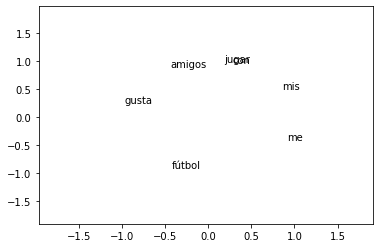

In [147]:



import matplotlib.pyplot as plt


fig, ax = plt.subplots()
print(words)
for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
    ax.set_xlim(min([vectors[word2int[w]][0] for w in words])-1, max([vectors[word2int[w]][0] for w in words])+1)
    ax.set_ylim(min([vectors[word2int[w]][1] for w in words])-1, max([vectors[word2int[w]][1] for w in words])+1)
plt.show()